In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**LOAD THE DATASET**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[7]

'horse'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

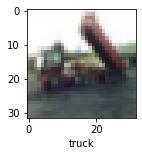

In [ ]:
plot_sample(X_train, y_train, 2)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.9273 - accuracy: 0.3072
Epoch 2/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.6429 - accuracy: 0.4231
Epoch 3/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5595 - accuracy: 0.4501
Epoch 4/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4934 - accuracy: 0.4749
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4350 - accuracy: 0.4952


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.5453 - accuracy: 0.4532


[1.5453481674194336, 0.45320001244544983]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.44      0.49      1000
           1       0.51      0.65      0.57      1000
           2       0.50      0.10      0.17      1000
           3       0.28      0.53      0.37      1000
           4       0.50      0.35      0.41      1000
           5       0.52      0.14      0.22      1000
           6       0.49      0.56      0.52      1000
           7       0.69      0.38      0.49      1000
           8       0.44      0.78      0.56      1000
           9       0.42      0.61      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.7121 - accuracy: 0.3769
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1674 - accuracy: 0.5929
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9897 - accuracy: 0.6554
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9064 - accuracy: 0.6874
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8236 - accuracy: 0.7138
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7754 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7219 - accuracy: 0.7501
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6652 - accuracy: 0.7673
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6169 - accuracy: 0.7845
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9024 - accuracy: 0.7020


[0.9023876190185547, 0.7020000219345093]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.55734378e-04, 1.11088748e-05, 6.63711398e-04, 9.71789658e-01,
        3.17218248e-04, 2.56924983e-02, 3.25598317e-04, 8.46581952e-06,
        6.94475952e-04, 3.41525069e-04],
       [1.88695471e-04, 3.08415806e-03, 1.04043934e-07, 1.38187950e-08,
        2.45637715e-08, 7.22034377e-11, 2.68732436e-09, 3.05625553e-10,
        9.96476114e-01, 2.50903511e-04],
       [4.45075110e-02, 1.27073139e-01, 2.79998407e-04, 1.72116142e-02,
        7.04853679e-04, 8.35221261e-04, 6.73360075e-04, 2.04951066e-04,
        7.11817324e-01, 9.66919288e-02],
       [7.91134596e-01, 1.86270792e-02, 3.55506735e-03, 2.95160152e-03,
        3.93094867e-02, 2.19704780e-05, 2.00516704e-04, 2.23016672e-04,
        1.43655166e-01, 3.21544532e-04],
       [8.66678285e-09, 9.49881326e-07, 1.16334460e-03, 7.95970485e-03,
        7.18652487e-01, 7.04760139e-04, 2.71491319e-01, 2.44434559e-05,
        2.74735658e-06, 2.89685289e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

TypeError: ignored

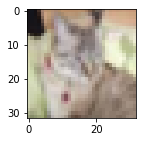

In [ ]:
plot_sample(X_test, y_test,8)

In [ ]:
classes[y_classes[8]]

'cat'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.84      0.80      0.82      1000
           2       0.59      0.58      0.58      1000
           3       0.48      0.60      0.54      1000
           4       0.58      0.71      0.64      1000
           5       0.71      0.50      0.59      1000
           6       0.72      0.80      0.76      1000
           7       0.80      0.73      0.77      1000
           8       0.86      0.76      0.81      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

